# R Analysis
### Import and load the needed packages

In [1]:
# Run this once
install.packages("corrplot")
install.packages("ggplot2")
install.packages("farver")
install.packages("RColorBrewer")
install.packages("labeling")
install.packages("effsize")
install.packages("GGally")

Installing package into '/workspaces/myfolder/.user-R-packages'
(as 'lib' is unspecified)

Installing package into '/workspaces/myfolder/.user-R-packages'
(as 'lib' is unspecified)

Installing package into '/workspaces/myfolder/.user-R-packages'
(as 'lib' is unspecified)

Installing package into '/workspaces/myfolder/.user-R-packages'
(as 'lib' is unspecified)

Installing package into '/workspaces/myfolder/.user-R-packages'
(as 'lib' is unspecified)

Installing package into '/workspaces/myfolder/.user-R-packages'
(as 'lib' is unspecified)

Installing package into '/workspaces/myfolder/.user-R-packages'
(as 'lib' is unspecified)



In [2]:
library(ggplot2)
library(dplyr)
library(readr)
library(corrplot)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


corrplot 0.95 loaded



### Load the dataset
Note: You may need to change the filepath to point to where your dataset lives.

In [3]:
df <- read_csv("/workspaces/myfolder/Educate2025_Coffee/global_coffee_productivity.csv")


Rows: 500 Columns: 8
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (4): Country, Job_Role, Work_From_Home, Age_Group
dbl (4): Coffee_Consumption, Productivity_Score, Sleep_Hours, Stress_Level

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Let the analysis begin!
Everyone's relationship with coffee is different - some people need their cup before they're functional for the day, while others are sensitive to the caffeine effects and stay away. Let's start by creating a histogram of overall coffee consumption to view this spread!

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Warning message:
"The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
i Please use `after_stat(count)` instead."


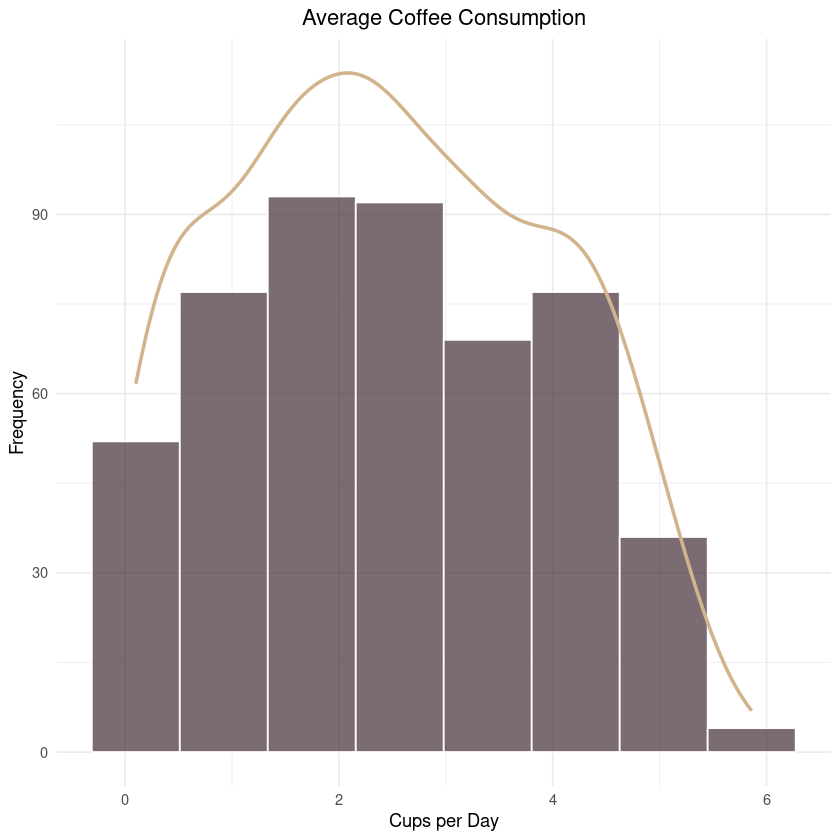

In [4]:
ggplot(df, aes(x = Coffee_Consumption)) +
  geom_histogram(bins = 8, fill = "#432b37", color = "white", alpha = 0.7) +
  geom_density(aes(y = ..count..), color = "tan", size=1) +
  labs(title = "Average Coffee Consumption",
       x = "Cups per Day",
       y = "Frequency") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

Looks pretty normal to me! Where do you fit into this curve - does coffee affect your productivity? What about your sleep? Does it calm your stress or add to it? 

Let's check out the correlations between the numeric variables!

                   Coffee_Consumption Productivity_Score  Sleep_Hours
Coffee_Consumption        1.000000000        0.007436995  0.002505129
Productivity_Score        0.007436995        1.000000000  0.946580370
Sleep_Hours               0.002505129        0.946580370  1.000000000
Stress_Level             -0.026669575       -0.058353028 -0.087320718
                   Stress_Level
Coffee_Consumption  -0.02666957
Productivity_Score  -0.05835303
Sleep_Hours         -0.08732072
Stress_Level         1.00000000


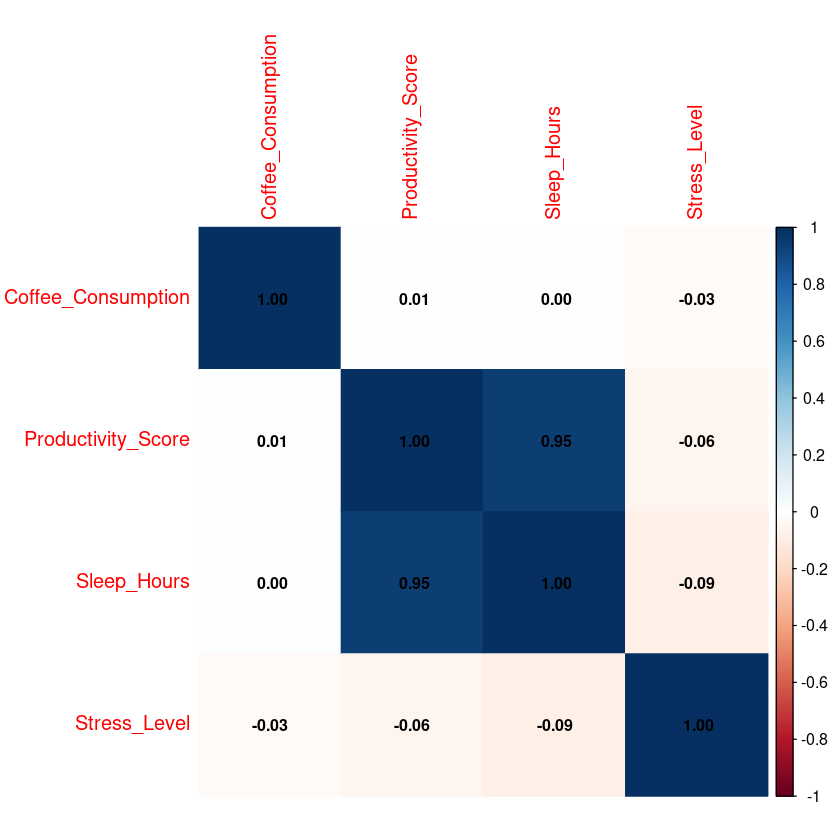

In [5]:
# Select only numeric columns
numeric_df <- df[sapply(df, is.numeric)]

# Compute correlation matrix
cor_matrix <- cor(numeric_df, use = "complete.obs")

# Print the matrix
print(cor_matrix)
corrplot(cor_matrix, method = "color", addCoef.col = "black", number.cex = 0.8)

Interesting! Sleep Hours and Productivity seem to be strongly correlated - makes sense. Let's look another graph - a scatterplot - to dive deeper into the relationship between Sleep Hours and Productivity. Adding age group may help identify further patterns in our data.

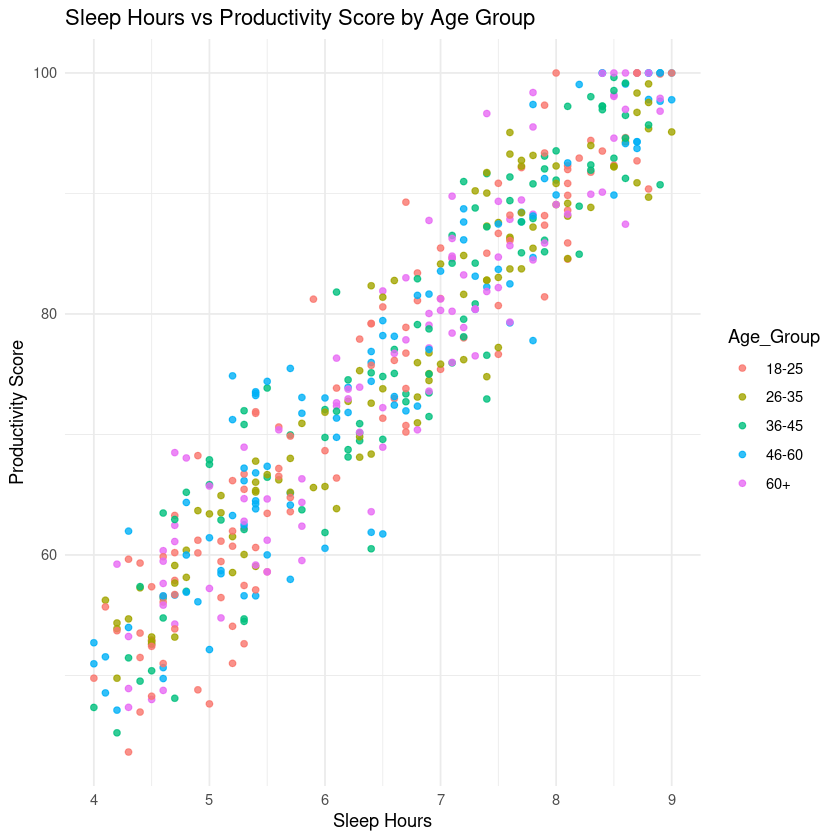

In [6]:
ggplot(df, aes(x = Sleep_Hours, y = Productivity_Score, color = Age_Group)) +
  geom_point(alpha = 0.8) +
  labs(title = "Sleep Hours vs Productivity Score by Age Group",
       x = "Sleep Hours", y = "Productivity Score") +
  theme_minimal()


### Run a t-test
In the world of "hybrid work," everyone wants to know how we've adjusted. Following our initial inquiry into coffee consumption, let's test whether coffee consumption varies based on whether someone works from home or goes into an office.

In [7]:
# Data prep for the t-test
df$Work_From_Home <- as.factor(df$Work_From_Home)

# --- T-TEST: Work From Home vs Productivity ---
t_test_result <- t.test(Coffee_Consumption ~ Work_From_Home, data = df)
print("T-Test: Coffee by Work From Home Status")
print(t_test_result)


[1] "T-Test: Coffee by Work From Home Status"

	Welch Two Sample t-test

data:  Coffee_Consumption by Work_From_Home
t = -0.70846, df = 494.29, p-value = 0.479
alternative hypothesis: true difference in means between group No and group Yes is not equal to 0
95 percent confidence interval:
 -0.3496251  0.1643102
sample estimates:
 mean in group No mean in group Yes 
         2.436111          2.528768 



I, personally, want a little more statistics to go with this t-test. Let's explicitly ask for this information.

Work_From_Home,Count,Mean,SD,Min,Max
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
No,253,2.436111,1.415039,0.1,5.622484
Yes,247,2.528768,1.506707,0.1,5.861078


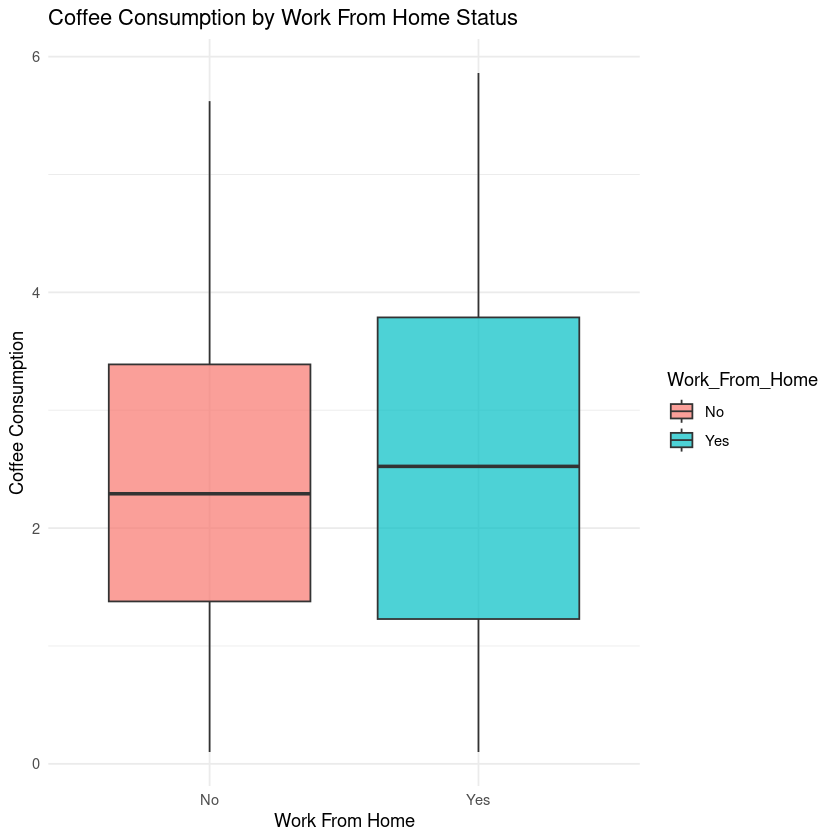

In [8]:
library(dplyr)

df %>%
  group_by(Work_From_Home) %>%
  summarise(
    Count = n(),
    Mean = mean(Coffee_Consumption, na.rm = TRUE),
    SD = sd(Coffee_Consumption, na.rm = TRUE),
    Min = min(Coffee_Consumption, na.rm = TRUE),
    Max = max(Coffee_Consumption, na.rm = TRUE)
  )

ggplot(df, aes(x = Work_From_Home, y = Coffee_Consumption, fill = Work_From_Home)) +
  geom_boxplot(alpha = 0.7) +
  labs(title = "Coffee Consumption by Work From Home Status",
       x = "Work From Home", y = "Coffee Consumption") +
  theme_minimal()

### ANOVA
Hmm coffee is consumed relatively evenly between those who work remotely or in the office. What about for those in different parts of the world? Let's answer the question: **Does coffee consumption vary among countries?**

In [ ]:
# Convert 'Country' to a factor if it's not already
df$Country <- as.factor(df$Country)

# Run one-way ANOVA
anova_result <- aov(Coffee_Consumption ~ Country, data = df)

# Display summary of the ANOVA
print("ANOVA Results: Coffee Consumption by Country")
summary(anova_result)

[1] "ANOVA Results: Coffee Consumption by Country"


             Df Sum Sq Mean Sq F value Pr(>F)
Country       9   26.1   2.904   1.371  0.198
Residuals   490 1038.0   2.118               

Once again, I want some summary stats and graphs to confirm the results above.

Country,Count,Mean,SD,Min,Max
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Australia,62,2.813263,1.385072,0.4494482,5.622484
Brazil,40,2.315524,1.584957,0.1000000,4.880818
Canada,59,2.370650,1.279661,0.1000000,4.693542
France,52,2.584518,1.451474,0.1000000,5.560085
Germany,45,2.637703,1.503019,0.1000000,5.476591
India,48,2.205289,1.482486,0.1000000,5.167783
Japan,56,2.347887,1.282869,0.1000000,4.737678
South Korea,40,2.734144,1.738416,0.1000000,5.861078
UK,47,2.684055,1.535209,0.1000000,5.339440


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Coffee_Consumption ~ Country, data = df)

$Country
                             diff        lwr       upr     p adj
Brazil-Australia      -0.49773980 -1.4359051 0.4404255 0.8029387
Canada-Australia      -0.44261331 -1.2839618 0.3987352 0.8107558
France-Australia      -0.22874546 -1.0986268 0.6411359 0.9979852
Germany-Australia     -0.17556089 -1.0814914 0.7303696 0.9998288
India-Australia       -0.60797424 -1.4973494 0.2814009 0.4770887
Japan-Australia       -0.46537628 -1.3181941 0.3874415 0.7753106
South Korea-Australia -0.07911990 -1.0172852 0.8590454 0.9999999
UK-Australia          -0.12920829 -1.0239003 0.7654838 0.9999859
USA-Australia         -0.69391727 -1.5684245 0.1805899 0.2592490
Canada-Brazil          0.05512649 -0.8923462 1.0025992 1.0000000
France-Brazil          0.26899434 -0.7039037 1.2418924 0.9970323
Germany-Brazil         0.32217890 -0.6830809 1.3274387 0.9910754
India-Bra

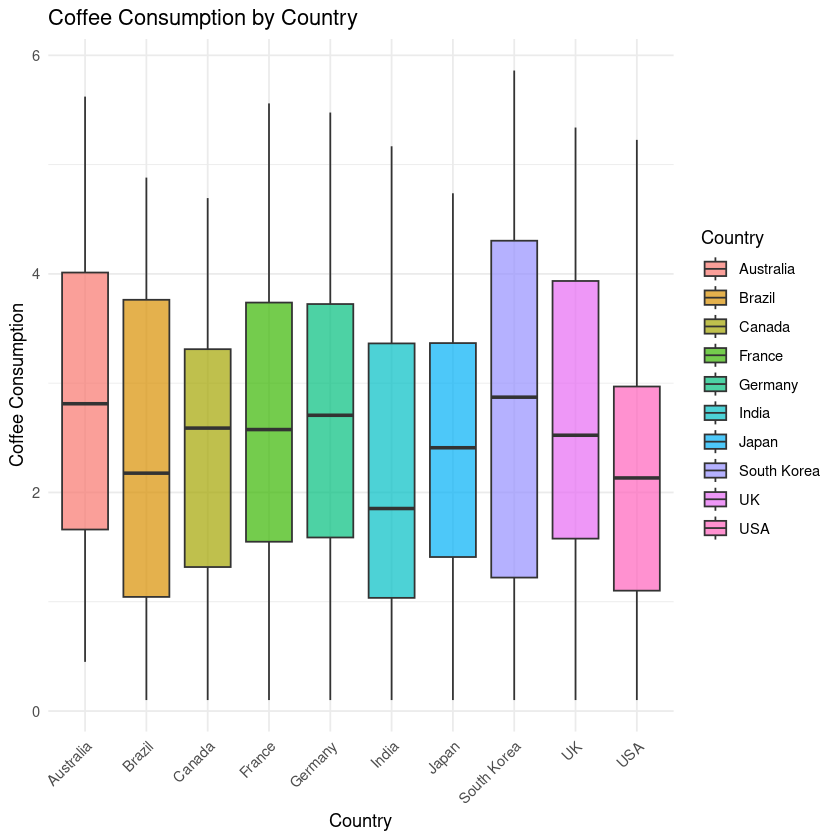

In [10]:
library(dplyr)

df %>%
  group_by(Country) %>%
  summarise(
    Count = n(),
    Mean = mean(Coffee_Consumption, na.rm = TRUE),
    SD = sd(Coffee_Consumption, na.rm = TRUE),
    Min = min(Coffee_Consumption, na.rm = TRUE),
    Max = max(Coffee_Consumption, na.rm = TRUE)
  )
  
tukey_result <- TukeyHSD(anova_result)
print(tukey_result)

ggplot(df, aes(x = Country, y = Coffee_Consumption, fill = Country)) +
  geom_boxplot(alpha = 0.7) +
  labs(title = "Coffee Consumption by Country",
       x = "Country", y = "Coffee Consumption") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

### Clustering
To break our participants into groups of similar behaviors.

In [11]:
# Select variables for clustering
X <- df %>% select(Sleep_Hours, Coffee_Consumption, Productivity_Score)

# Run K-Means clustering with 3 clusters
set.seed(42)  # for reproducibility
kmeans_result <- kmeans(X, centers = 3)

# Add cluster labels to the original dataframe
df$Cluster <- as.factor(kmeans_result$cluster)

# View the clustered data
head(df)

Country,Job_Role,Work_From_Home,Coffee_Consumption,Productivity_Score,Sleep_Hours,Stress_Level,Age_Group,Cluster
<fct>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
Australia,Product Manager,No,1.866369,99.63089,8.5,2,36-45,1
USA,Product Manager,Yes,4.982322,73.54708,5.4,9,46-60,2
Germany,Sales Executive,No,5.476591,48.00716,4.5,8,60+,3
South Korea,Designer,No,1.642824,66.81485,5.4,6,46-60,2
South Korea,Product Manager,Yes,2.919357,83.74679,7.7,10,26-35,1
Australia,Sales Executive,Yes,3.089720,79.56437,7.2,4,36-45,2


Let's generate some summary information about each cluster grouping.

In [12]:
# Mean of each variable by cluster
cluster_means <- df %>%
  group_by(Cluster) %>%
  summarise(
    Sleep_Hours = mean(Sleep_Hours, na.rm = TRUE),
    Coffee_Consumption = mean(Coffee_Consumption, na.rm = TRUE),
    Productivity_Score = mean(Productivity_Score, na.rm = TRUE)
  )

# Min of each variable by cluster
cluster_min <- df %>%
  group_by(Cluster) %>%
  summarise(
    Sleep_Hours = min(Sleep_Hours, na.rm = TRUE),
    Coffee_Consumption = min(Coffee_Consumption, na.rm = TRUE),
    Productivity_Score = min(Productivity_Score, na.rm = TRUE)
  )

# Max of each variable by cluster
cluster_max <- df %>%
  group_by(Cluster) %>%
  summarise(
    Sleep_Hours = max(Sleep_Hours, na.rm = TRUE),
    Coffee_Consumption = max(Coffee_Consumption, na.rm = TRUE),
    Productivity_Score = max(Productivity_Score, na.rm = TRUE)
  )

# Range (max - min) of each variable by cluster
cluster_range <- df %>%
  group_by(Cluster) %>%
  summarise(
    Sleep_Hours = max(Sleep_Hours, na.rm = TRUE) - min(Sleep_Hours, na.rm = TRUE),
    Coffee_Consumption = max(Coffee_Consumption, na.rm = TRUE) - min(Coffee_Consumption, na.rm = TRUE),
    Productivity_Score = max(Productivity_Score, na.rm = TRUE) - min(Productivity_Score, na.rm = TRUE)
  )

# Display results
print("Cluster Means:")
print(cluster_means)

print("Cluster Min:")
print(cluster_min)

print("Cluster Max:")
print(cluster_max)

print("Cluster Ranges:")
print(cluster_range)

[1] "Cluster Means:"


# A tibble: 3 x 4
  Cluster Sleep_Hours Coffee_Consumption Productivity_Score
  <fct>         <dbl>              <dbl>              <dbl>
1 1              8.06               2.60               91.9
2 2              6.47               2.23               75.0
3 3              4.96               2.61               58.0
[1] "Cluster Min:"
# A tibble: 3 x 4
  Cluster Sleep_Hours Coffee_Consumption Productivity_Score
  <fct>         <dbl>              <dbl>              <dbl>
1 1               6.7                0.1               83.6
2 2               4.7                0.1               66.5
3 3               4                  0.1               43.6
[1] "Cluster Max:"
# A tibble: 3 x 4
  Cluster Sleep_Hours Coffee_Consumption Productivity_Score
  <fct>         <dbl>              <dbl>              <dbl>
1 1               9                 5.56              100  
2 2               7.9               5.26               83.4
3 3               6.5               5.86               66.4
[1] "Clu

Let's finish with a visualization of our clusters.

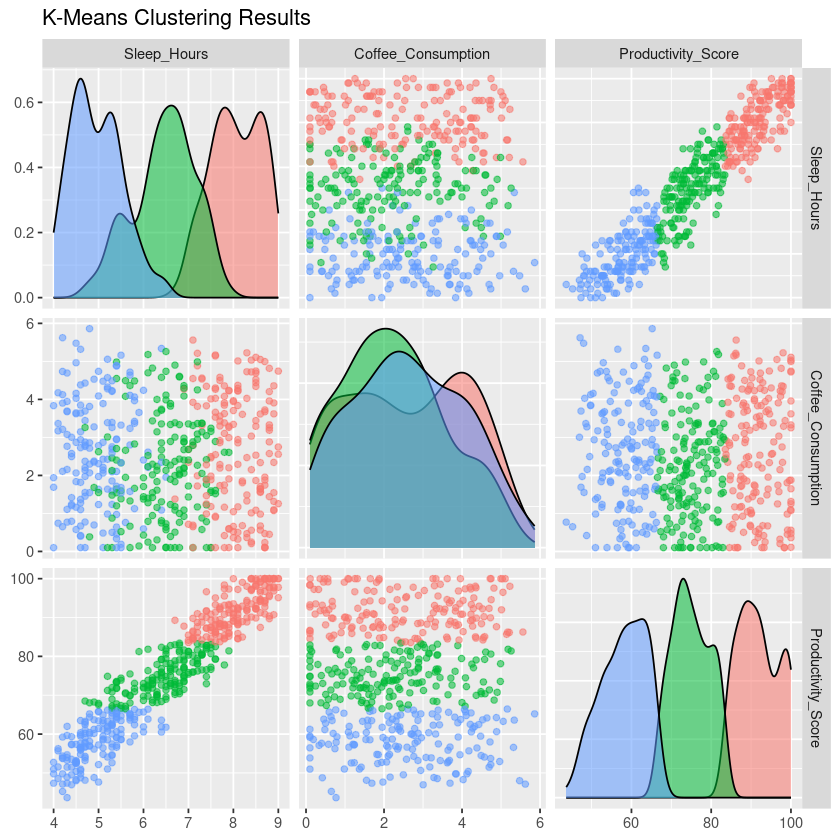

In [13]:
# Load necessary libraries
library(GGally)

# Make sure Cluster is a factor
df$Cluster <- as.factor(df$Cluster)

# Create pair plot
ggpairs(df,
        columns = c("Sleep_Hours", "Coffee_Consumption", "Productivity_Score"),
        aes(color = Cluster, alpha = 0.7),
        upper = list(continuous = wrap("points", size = 1.5)),
        lower = list(continuous = wrap("points", size = 1.5)),
        diag = list(continuous = wrap("densityDiag"))) +
  ggtitle("K-Means Clustering Results")